Let's try and see clusters of Categories among the wikipedia articles using the categorylinks.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from sklearn.manifold import Isomap

In [4]:
import pymysql

# your username and password go here!
creds = {'user': 'brian', 
         'pswd': 'farley'} 


connection = pymysql.connect(host="atriskwiki.cbprs6vpqcbz.us-west-1.rds.amazonaws.com",
                            user=creds['user'],
                            password=creds['pswd'],
                            port=3306,
                            db="atriskwiki",
                            charset="utf8")

cur = connection.cursor()

In [5]:
titleQ = "SELECT page_id, page_title FROM core WHERE page_is_ep = 1"
colnames = ['page_id','page_title']
cur.execute(titleQ)
article_ids_titles = pd.DataFrame(list(cur.fetchall()), columns=colnames)
article_ids_titles

,page_id,page_title
0,25,Autism
1,290,A
2,307,Abraham_Lincoln
3,308,Aristotle
4,594,Apollo
5,620,Animal_Farm
6,624,Alaska
7,628,Aldous_Huxley
8,655,Abacus
9,662,Apollo_11


In [2]:
# Open the file from the repository

with open("cl_epa.txt", "r") as f:
    data=json.load(f)
len(data)

7524

In [3]:
data.keys()

dict_keys(['4913435', '7923200', '6207376', '776049', '29276586', '42268856', '5182508', '1114570', '3716137', '39258609', '44788382', '2268744', '2646179', '1221227', '644622', '8451030', '27918996', '34635826', '3928', '25740', '8083', '7559856', '2844938', '32650899', '20646279', '1390968', '17990231', '33123836', '657267', '1303679', '11976936', '19356', '50015044', '29000339', '16808', '25946691', '20455', '37556', '961522', '3696045', '68319', '20958', '166202', '6566965', '8282374', '37398', '181892', '768413', '136116', '1839386', '2957039', '21161782', '44992693', '2328009', '8810772', '1398485', '29003819', '68253', '21474', '2170524', '182984', '5023846', '15524513', '1968174', '20648200', '12754176', '1703200', '2594', '33591033', '2338255', '513835', '18994037', '21648', '725318', '38779246', '23497596', '702389', '10823', '274608', '48442158', '26772964', '2828209', '1082198', '695403', '97317', '418944', '7999675', '1271019', '86700', '18969800', '48625599', '1039393', '

In [6]:
# I need an array of [[1,2,3... ],[0,3,5...], ...] 
# so I prepare a vocabulary to then use the vectorizer

# Create the all-encompassing vocabulary
import re

def GetVocabList(data_dict):
    #data_dict is a dictionary {keys}:["str1", "str2",..., "strN"]
    #this functions yields ["str1", "str2", ... "strM"], where M is the sum of N over all Keys
    list_categories = []
    for key in data_dict:  
        links=[]
        for n in range(len(data_dict[key])):
        
            # Remove the following regular expressions
            
            re0="protected_page"
            #re1="with_accessdate"
            #re2=".rticle"
            #re3=".ikipedia"
            #re4="to_be_expanded"
            #re5="with_unsourced_statements"
            #re6="needing_additional_references"
            #re7="lacking_sources"
            #re8="containing_potentially_dated_statements"
            #re9="with_dead_external_links"
            
            if not any(re.search(regex, data_dict[key][n]) for regex in [re0]):
                links.append(data_dict[key][n])
        links=" ".join(links)
        list_categories.append(links)
                
    return list_categories

# list_categories looks like ["str1 strN", ..., "... str137593"]]. A list strings, each is " ".join(links_in_article)

In [7]:
# Get clean list of links
clean_categories=GetVocabList(data)

print(len(clean_categories))
clean_categories[3200]   #it's a list of strings

7524


'1963_births American_football_quarterbacks American_players_of_Canadian_football Canadian_football_quarterbacks Grey_Cup_champions Indianapolis_Colts_players Infobox_NFL_player_article_missing_alt_text Living_people Minnesota_Vikings_players NFL_player_using_deprecated_currentteam_parameter NFL_player_with_pastcoaching_parameter NFL_player_with_pastexecutive_parameter National_Football_League_announcers People_from_Valley_Center,_California Players_of_American_football_from_California San_Diego_Chargers_players Sportspeople_from_Escondido,_California Sportspeople_from_Long_Beach,_California USC_Trojans_football_players Undrafted_National_Football_League_players Wikipedia_pages_semi-protected_from_banned_users Winnipeg_Blue_Bombers_players'

In [8]:
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  

article_ids = data.keys()
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_features = vectorizer.fit_transform(clean_categories)

In [9]:
print(type(train_features))
print(train_features.shape)

# Numpy arrays are easy to work with, so convert the result to an 
# array  (instead of a matrix)
train_features_array = train_features.toarray()
print(type(train_features_array))
print(train_features_array.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(7524, 5000)
<class 'numpy.ndarray'>
(7524, 5000)


In [10]:
train_features_array[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
# I need to feed the Isomap an array made of a list of lists (with the vectorized values)!

iso = Isomap(n_components=2)
data_projected = iso.fit_transform(train_features_array)

In [12]:
data_projected.shape

(7524, 2)

In [13]:
article_ids = data.keys()
articles_projected = pd.DataFrame(data_projected,index=article_ids)
articles_projected

,0,1
4913435,-1.932591,-0.016276
7923200,1.300510,-0.530015
6207376,-2.085067,1.879867
776049,1.910479,-1.397328
29276586,-2.558695,-1.685320
42268856,0.275893,-0.489482
5182508,-0.024643,-0.015397
1114570,-1.070060,3.441537
3716137,-1.187425,-0.805848
39258609,0.361253,0.199820


In [34]:
articles_projected.index = articles_projected.index.map(int) #necessary because json keys are always strings

In [36]:
projected_titles = pd.merge(article_ids_titles, articles_projected, how='inner', left_on=article_ids_titles['page_id'],
                           left_index=False, right_index=True)
projected_titles

,page_id,page_title,0,1
0,25,Autism,2.726247,-2.163630
1,290,A,0.247464,-0.227468
2,307,Abraham_Lincoln,-0.069380,0.276164
3,308,Aristotle,-2.331193,0.455128
4,594,Apollo,3.696455,3.246080
5,620,Animal_Farm,1.759740,-0.426425
6,624,Alaska,0.505490,1.358728
7,628,Aldous_Huxley,-2.986280,-0.715049
8,655,Abacus,6.369459,-4.405622
9,662,Apollo_11,0.430688,1.285753


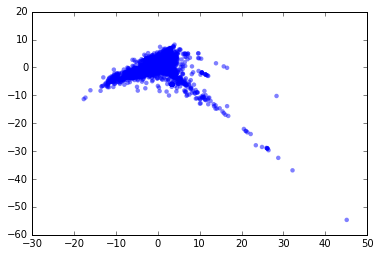

In [14]:


plt.scatter(data_projected[:, 0], data_projected[:, 1], c="blue",
            edgecolor='none', alpha=0.5);   #, cmap=plt.cm.get_cmap('nipy_spectral', 10)
# plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [ ]:
for i in range(len(data_projected)):
    if data_projected[:1]